# Sensitivity Analysis - Project 1 Extension

This exercise is an extension of the model prepared in Project 1 to accommodate Sensitivity Analysis on the TVM Model

- [**Setup**](#Setup): Imported the numpy_financial library to calculate the NPV of the cash flows. Also imported dataclass and numpy as basic libraries.: in addition to the imported libraries, which remain the same, I also imported the pandas library to study the project's Sensitivity Analysis. A list of the imported libraries are given below:
    - Dataclass is the class that contains our main inputs
    - Numpy is for basic calculations
    - numpy_financial is for calculating NPV, as the npv() function in numpy is deprecated
    - pandas is the library I will use to incorporate Sensitivity Analysis (Lab Exercise)
 
- [**Inputs**](#Inputs): The previous inputs have been modified into two dictionaries
    - sensitivity_values: dictionary containing:
        - n_phones: number of phones manufactured by a machine
        - price_scrap: scrap price of a machine post working lifetime
        - price_phone: price of the phone
        - cost_machine_adv: equity investment per year, used to buy either machines or spend on advertisements
        - cogs_phone: variable cost of the phone
        - n_life: number of working years for a single machine
        - n_machines: multiple inputs for number of machines bought by the company
        - d_1: multiple inputs for initial demand of the phone
        - g_d: growth rate of demand
        - max_year: number of years over which the company forecasts the NPV
        - interest: interest rate earned on investments
    -  labels: dictionary containing the labels of the dictionary keys provided above.
- [**Outputs**](#Outputs): The below code is separated into two parts - NPV Calculation with multiple inputs and Sensitivity Analysis.
    - NPV Calculation: states the NPVs based on varying inputs for number of machines and initial demands, outputs the result in the form of an array
    - Sensitivity Analysis: displays the results using a styled DataFrame with varying background gradients and a Hexbin plot.

## Setup

Imported libraries for further calculations are here:

In [1]:
from dataclasses import dataclass
import numpy as np
import numpy_financial as npf
import pandas as pd

## Inputs

All inputs are declared in the ModelInputs class

In [3]:
@dataclass
class ModelInputs:
    # We note sensitivity analysis for when the number of machines change and the change in initial demand
    # All other inputs remain the same for ease of understanding
    sensitivity_values = {
        'n_phones': 100000,
        'price_scrap': 50000,
        'price_phone': 500,
        'cost_machine_adv': 1000000,
        'cogs_phone': 250,
        'n_life': 10,
        'n_machines': [i * 2 for i in range(1, 3)],
        'd_1': [i * 100000 for i in range(1, 3)],
        'g_d': 0.2,
        'max_year': 20,
        'interest': 0.05
    }
    labels = {
        'n_phones': 'No. of Phones per Machine/yr',
        'price_scrap': 'Scrap value of Machine',
        'price_phone': 'Price per phone',
        'cost_machine_adv': 'Cost of Machine/Advert',
        'cogs_phone': 'Variable cost of Phone',
        'n_life': 'Life of Machine',
        'n_machines': 'No. of Machines',
        'd_1': 'Initial Demand',
        'g_d': 'Growth rate with increasing demand',
        'max_year': 'No. of years calculated',
        'interest': 'Interest Rate'
    }

## Outputs:

### NPV Calculation with modified inputs

In this section, I use the cash_flow_calc_sa_values() function to calculate the Cash flows and NPV of the modified inputs mentioned above. Unlike the previous example, this portion of the output only uses one function.

In [4]:
# Cash flow and NPV Calculation in a single function for Sensitivity Analysis:
# We note sensitivity analysis for when the number of machines change and changing demand
npv_array = []

def cash_flow_calc_sa_values(sensitivity_values):
    demand, revenue, var_phone, cash_flow, scrap_array  = ([] for i in range(5))

    i = 1
    # calculating demands for varying initial demands and machines
    for i in range(sensitivity_values['max_year'] + 1):
        for j in sensitivity_values['n_machines']:
            if i <= j:
                for k in sensitivity_values['d_1']:
                    demand.insert(i, k)
            else:
                for k in sensitivity_values['d_1']: 
                    val = k * (1 + sensitivity_values['g_d']) ** (i - j)
                    demand.insert(i, val)

    supply = 0

    for i, j in zip(range(sensitivity_values['max_year'] + 1), range(len(demand) + 1)):
        quantity = 0
        if i == 0 and j == 0:
            pass
        else:
            for m in sensitivity_values['n_machines']:
                if i < sensitivity_values['n_life'] and j < sensitivity_values['n_life']:
                    supply = sensitivity_values['n_phones'] * j
                    quantity = min(demand[j], supply)
                    revenue.insert(i, sensitivity_values['price_phone'] * quantity)
                    var_phone.insert(i, sensitivity_values['cogs_phone'] * quantity)
                if i % m == 0 and i == sensitivity_values['n_life'] and j == sensitivity_values['n_life']:
                    supply = sensitivity_values['n_phones'] * m
                    quantity = min(demand[j], supply)
                    revenue.insert(i, sensitivity_values['price_phone'] * quantity)
                    var_phone.insert(i, sensitivity_values['cogs_phone'] * quantity)
                elif i % m == 0 and i-sensitivity_values['n_life'] == m:
                    supply = 0
                    quantity = min(demand[j], supply)
                    revenue.insert(i, sensitivity_values['price_phone'] * quantity)
                    var_phone.insert(i, sensitivity_values['cogs_phone'] * quantity)
                elif i % m == 0 and i > sensitivity_values['n_life'] and i - sensitivity_values['n_life'] > m:
                    supply = 0
                    quantity = min(demand[j], supply)
                    revenue.insert(i, sensitivity_values['price_phone'] * quantity)
                    var_phone.insert(i, sensitivity_values['cogs_phone'] * quantity)
                elif i % m != 0 and i % sensitivity_values['n_life'] > m:
                    supply = 0
                    quantity = min(demand[j], supply)
                    revenue.insert(i, sensitivity_values['price_phone'] * quantity)
                    var_phone.insert(i, sensitivity_values['cogs_phone'] * quantity)
                elif i % m != 0 and i % sensitivity_values['n_life'] < m:
                    supply = sensitivity_values['n_phones'] * (m - (i% sensitivity_values['n_life']))
                    quantity = min(demand[j], supply)
                    revenue.insert(i, sensitivity_values['price_phone'] * quantity)
                    var_phone.insert(i, sensitivity_values['cogs_phone'] * quantity)
                else:
                    supply = sensitivity_values['n_phones'] * i
                    quantity = min(demand[j], supply)
                    revenue.insert(i, sensitivity_values['price_phone'] * quantity)
                    var_phone.insert(i, sensitivity_values['cogs_phone'] * quantity)
                
                if i == 0 and j == 0:
                    pass
                elif i > m and i - sensitivity_values['n_life'] <= m:
                    scrap_array.insert(i, sensitivity_values['price_scrap'])
                else:
                    scrap_array.insert(i, 0)

                for (i, j, k) in zip(range(len(revenue)), range(len(var_phone)), range(len(scrap_array))):
                    calc = revenue[i] - var_phone[j] - sensitivity_values['cost_machine_adv'] + scrap_array[k]
                    cash_flow.insert(i, calc)

                # print(f"Yearly Cash Flows: {cash_flow}\n")
            
                # NPV Calculation inside this function itself
                npv = npf.npv(sensitivity_values['interest'], cash_flow)
                
                # print(f"Net Present Value of Cash Flows: {npv}")
                npv_array.append(npv)
                

model_data = ModelInputs()
cash_flows_npv = cash_flow_calc_sa_values(model_data.sensitivity_values)
print(f"NPV Array: {npv_array}")

NPV Array: [24000000.0, 21857142.857142854, 17872691.93391642, 82874477.4291471, 134795766.10909823, 234137042.77859783, 341669657.6125934, 414658948.9534258, 451823053.421704, 520250647.22631305, 590032948.8343681, 691421640.1626924, 704461099.9720833, 736364372.1402756, 853938463.9955195, 903667634.1862388, 925535354.4840534, 914330912.4374751, 908107135.4968183, 886616625.8453376, 863651724.6378741, 838647491.7240044, 803597752.8150675, 804685246.1149086, 780111131.502503, 768413892.8463476, 741940048.7609714, 723924660.8949875, 698263480.8457062, 682660851.4847858, 659950128.9821767, 646902889.0548183, 626766849.0137538, 632331538.4657483, 616686811.8358625, 612686835.9324589, 596227680.484355, 588094920.6295776, 572223800.4419869, 565118243.4836539]


### Sensitivity Analysis - Building Hex-Bin Plots and Styled Dataframes

This portion of the output will convert the above NPV array into a pandas Dataframe that compares the changes in the NPV array to varying number of machines and initial demands.

In [5]:
# Creating the pandas Dataframe for the styled Dataframe and Hexbin plot
sensitivity_values_output = []
for x1 in model_data.sensitivity_values['n_machines']:
    for x2 in model_data.sensitivity_values['d_1']:
        for y in npv_array:
            sensitivity_values_output.append((x1, x2, y))

# suppressing scientific notation
pd.options.display.float_format = '{:.2f}'.format

sensitivity_values_output
sa_values = pd.DataFrame(sensitivity_values_output, columns=['No. of Machines', 'Initial Demands', 'NPV'])
sa_values.style.background_gradient(subset='NPV', cmap='RdYlGn')

,No. of Machines,Initial Demands,NPV
0,2,100000,24000000.000000
1,2,100000,21857142.857143
2,2,100000,17872691.933916
3,2,100000,82874477.429147
4,2,100000,134795766.109098
5,2,100000,234137042.778598
6,2,100000,341669657.612593
7,2,100000,414658948.953426
8,2,100000,451823053.421704
9,2,100000,520250647.226313


/Users/tejaswinisundar/PycharmProjects/pythonProject/pythonProject/venv/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/tejaswinisundar/PycharmProjects/pythonProject/pythonProject/venv/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


<Axes: xlabel='No. of Machines', ylabel='Initial Demands'>

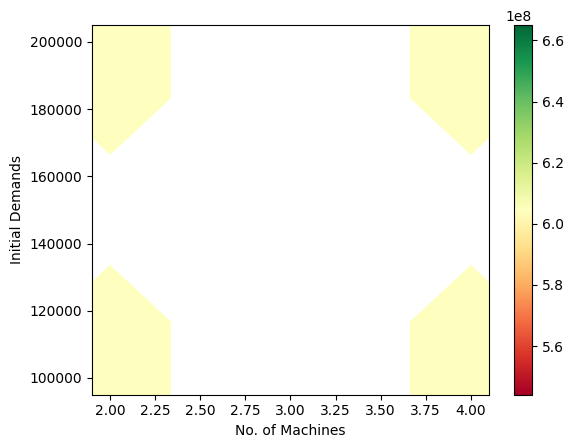

In [6]:
sa_values.plot.hexbin(x='No. of Machines', y='Initial Demands', C='NPV', gridsize=3, cmap='RdYlGn', sharex=False)